## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Считывание данных
power_data = pd.read_csv('data/solarpower.csv')

# Перевод дат в формат datetime
power_data['date'] = pd.to_datetime(power_data['date'])

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [3]:
for i in range(len(power_data['cum_power'])):
    if power_data['cum_power'][i] == -1:
        power_data['cum_power'][i] = (power_data['cum_power'][i-1] + power_data['cum_power'][i+1])/2

/tmp/ipykernel_3156/1785316122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data['cum_power'][i] = (power_data['cum_power'][i-1] + power_data['cum_power'][i+1])/2


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [4]:
# Создание признака ежедневной выработки
power_data['day_power'] = power_data['cum_power'].diff()

month_power = power_data.groupby(power_data['date'].dt.to_period('M')).sum()
del month_power['cum_power']
month_power.rename(columns={'day_power':'month_power'}, inplace=True)

# Отображение данных о ежемесячной выработке
display(month_power)

,month_power
date,
2017-01,97.0
2017-02,104.0
2017-03,334.0
2017-04,489.0
2017-05,589.0
2017-06,645.0
2017-07,562.0
2017-08,467.0
2017-09,346.0


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

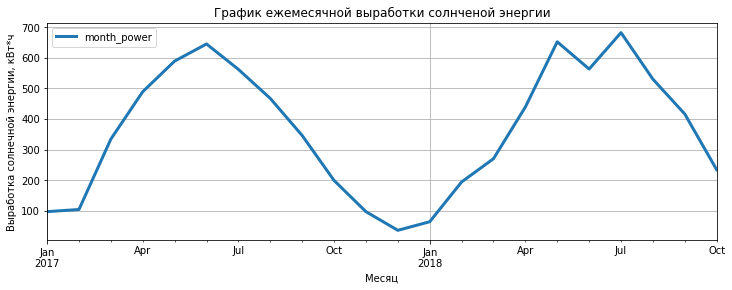

In [5]:
month_power.plot(
    kind='line',
    figsize=(12, 4),
    title='График ежемесячной выработки солнченой энергии',
    xlabel='Месяц',
    ylabel='Выработка солнечной энергии, кВт*ч',
    grid = True,
    lw=3
);

Выводы по результатам анализа графика ежемесячной выработки солнечной энергии:
- ежемесячная выработка солнечной энергии имеет восходящий тренд в месяцы с января по июнь-илюль, в месяцы с июня-июля по декабрь ежемесячная выработка имеет нисходящий тренд;
- значение ежемесячной выработки солнечной энергии зависит от продолжительности светового дня, солнечной активности, облачности, загрязнения поверхности солнечных батарей, что объясняет полученные значения на графике. В зимние и осенние месяцы, в целом, наблюдается наименьшая выработка солнечной энергии, что обусловлено низкой продолжительностью светового дня, низкой солнечной активностью, высоким показателем облачности. Напротив же, в летние и весенние месяцы, в целом, наблюдается наивысшая выработка солнечной энергии, что обусловленно высоким показателем продолжительности светового дня и солнечной активности, а также низким показателм облачности.

In [7]:
display(power_data.head())

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0
